In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#rmsd_file = pd.read_csv("rmsd.dat", sep=" ", names=["frame", "rmsd"])
freeE_file = pd.read_csv("metady_01_01_8.fes", sep=" ", names=["rmsd1", "freeE"])

In [23]:
rmsd_file["rmsd"].mean(axis=0)

1.317430482890573

In [3]:
freeE_file

,rmsd1,freeE
0,1.858527e-08,-0.050000
1,2.535098e-01,-0.214185
2,5.070196e-01,-3.331274
3,7.605294e-01,-4.669231
4,1.014039e+00,-4.546056
5,1.267549e+00,-3.967386
6,1.521059e+00,-3.950416
7,1.774569e+00,-4.392986
8,2.028078e+00,-4.936048
9,2.281588e+00,-5.166222


Text(0.5, 0, 'RMSD ($\\AA$)')

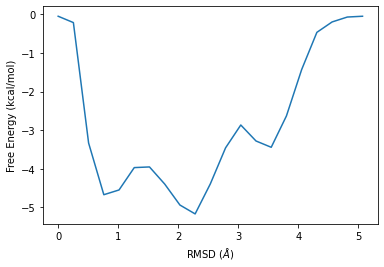

In [4]:
plt.plot(freeE_file["rmsd1"], freeE_file["freeE"])
plt.ylabel("Free Energy (kcal/mol)")
plt.xlabel("RMSD ($\AA$)")

In [5]:
kbT = 1.9857831*10**-3*300
kbT

0.59573493

In [6]:
freeE_1 = freeE_file
freeE_1["power"]=freeE_1["freeE"]*(-1)/kbT
freeE_1

,rmsd1,freeE,power
0,1.858527e-08,-0.050000,0.083930
1,2.535098e-01,-0.214185,0.359531
2,5.070196e-01,-3.331274,5.591874
3,7.605294e-01,-4.669231,7.837766
4,1.014039e+00,-4.546056,7.631005
5,1.267549e+00,-3.967386,6.659649
6,1.521059e+00,-3.950416,6.631163
7,1.774569e+00,-4.392986,7.374062
8,2.028078e+00,-4.936048,8.285645
9,2.281588e+00,-5.166222,8.672014


In [7]:
freeE_1["expo"]=np.exp(freeE_1["power"])
freeE_1

,rmsd1,freeE,power,expo
0,1.858527e-08,-0.050000,0.083930,1.087553
1,2.535098e-01,-0.214185,0.359531,1.432657
2,5.070196e-01,-3.331274,5.591874,268.237751
3,7.605294e-01,-4.669231,7.837766,2534.536700
4,1.014039e+00,-4.546056,7.631005,2061.120865
5,1.267549e+00,-3.967386,6.659649,780.277103
6,1.521059e+00,-3.950416,6.631163,758.363918
7,1.774569e+00,-4.392986,7.374062,1594.096316
8,2.028078e+00,-4.936048,8.285645,3966.522556
9,2.281588e+00,-5.166222,8.672014,5837.244102


In [8]:
normalization_param = freeE_1["expo"].sum()
normalization_param

20504.236244933345

In [13]:
freeE_1["probability"] = freeE_1["expo"]/normalization_param
freeE_1

,rmsd1,freeE,power,expo,final,probability
0,1.858527e-08,-0.050000,0.083930,1.087553,9.857701e-13,0.000053
1,2.535098e-01,-0.214185,0.359531,1.432657,1.771305e-05,0.000070
2,5.070196e-01,-3.331274,5.591874,268.237751,6.632863e-03,0.013082
3,7.605294e-01,-4.669231,7.837766,2534.536700,9.400934e-02,0.123610
4,1.014039e+00,-4.546056,7.631005,2061.120865,1.019330e-01,0.100522
5,1.267549e+00,-3.967386,6.659649,780.277103,4.823586e-02,0.038054
6,1.521059e+00,-3.950416,6.631163,758.363918,5.625745e-02,0.036986
7,1.774569e+00,-4.392986,7.374062,1594.096316,1.379634e-01,0.077745
8,2.028078e+00,-4.936048,8.285645,3966.522556,3.923296e-01,0.193449
9,2.281588e+00,-5.166222,8.672014,5837.244102,6.495334e-01,0.284685


In [14]:
freeE_1["rmsd-probability"] = freeE_1["rmsd1"]*freeE_1["probability"]
freeE_1

,rmsd1,freeE,power,expo,final,probability,rmsd-probability
0,1.858527e-08,-0.050000,0.083930,1.087553,9.857701e-13,0.000053,9.857701e-13
1,2.535098e-01,-0.214185,0.359531,1.432657,1.771305e-05,0.000070,1.771305e-05
2,5.070196e-01,-3.331274,5.591874,268.237751,6.632863e-03,0.013082,6.632863e-03
3,7.605294e-01,-4.669231,7.837766,2534.536700,9.400934e-02,0.123610,9.400934e-02
4,1.014039e+00,-4.546056,7.631005,2061.120865,1.019330e-01,0.100522,1.019330e-01
5,1.267549e+00,-3.967386,6.659649,780.277103,4.823586e-02,0.038054,4.823586e-02
6,1.521059e+00,-3.950416,6.631163,758.363918,5.625745e-02,0.036986,5.625745e-02
7,1.774569e+00,-4.392986,7.374062,1594.096316,1.379634e-01,0.077745,1.379634e-01
8,2.028078e+00,-4.936048,8.285645,3966.522556,3.923296e-01,0.193449,3.923296e-01
9,2.281588e+00,-5.166222,8.672014,5837.244102,6.495334e-01,0.284685,6.495334e-01


In [10]:
freeE_1["final"] = freeE_1["rmsd1"]*freeE_1["expo"]/normalization_param
freeE_1

,rmsd1,freeE,power,expo,final
0,1.858527e-08,-0.050000,0.083930,1.087553,9.857701e-13
1,2.535098e-01,-0.214185,0.359531,1.432657,1.771305e-05
2,5.070196e-01,-3.331274,5.591874,268.237751,6.632863e-03
3,7.605294e-01,-4.669231,7.837766,2534.536700,9.400934e-02
4,1.014039e+00,-4.546056,7.631005,2061.120865,1.019330e-01
5,1.267549e+00,-3.967386,6.659649,780.277103,4.823586e-02
6,1.521059e+00,-3.950416,6.631163,758.363918,5.625745e-02
7,1.774569e+00,-4.392986,7.374062,1594.096316,1.379634e-01
8,2.028078e+00,-4.936048,8.285645,3966.522556,3.923296e-01
9,2.281588e+00,-5.166222,8.672014,5837.244102,6.495334e-01


In [12]:
avg_rmsd = freeE_1["final"].sum()
avg_rmsd

1.859608153190057

In [16]:
avg_rmsd1 = freeE_1["rmsd-probability"].sum()
avg_rmsd1

1.859608153190057